In [1]:
import numpy as np
import pandas as pd


In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)


In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:

movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
#here we have to combine both using the features that is common in both movietitles and df
movies=pd.merge(df,movie_titles,on='item_id')

In [7]:
movies

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [9]:
movies.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [11]:
movies.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [12]:
ratings=pd.DataFrame(movies.groupby('title')['rating'].mean())

In [13]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [14]:
ratings['no_of_ratings']=pd.DataFrame(movies.groupby('title')['rating'].count())
ratings.head()

,rating,no_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


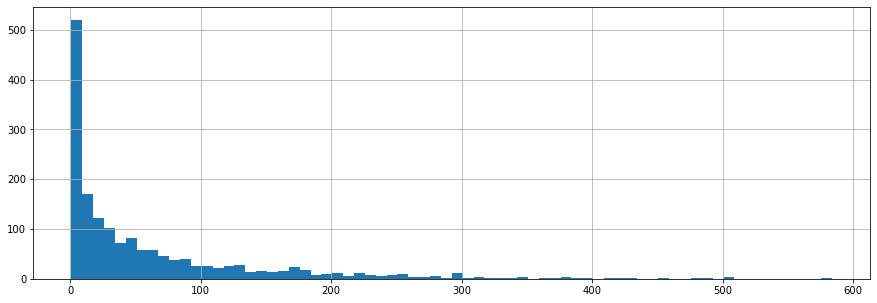

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

ratings['no_of_ratings'].hist(bins=70)



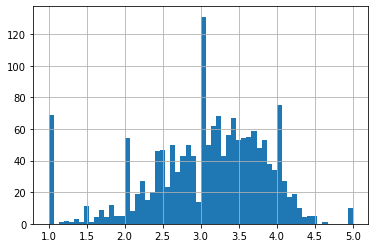

In [22]:
ratings['rating'].hist(bins=60)

In [26]:
#CREATE A PIVOT TABLE
pivot=movies.pivot_table(index='user_id',columns='title',values='rating')
pivot
#this table shows every users ratings to each movies .null values specifies that a particular use does not give a ratings

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
ratings.sort_values('no_of_ratings',ascending=False).head(10)

,rating,no_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [35]:
#choose any movies u want
Scream_user_ratings=pivot['Scream (1996)']
Scream_user_ratings

user_id
0      NaN
1      NaN
2      3.0
3      2.0
4      4.0
      ... 
939    NaN
940    NaN
941    NaN
942    NaN
943    NaN
Name: Scream (1996), Length: 944, dtype: float64

In [38]:
Scream_user_ratings.dropna(inplace=True)

In [40]:
#here we find the correlation between scream and remaining movies
similartoscream=pivot.corrwith(Scream_user_ratings)

C:\Users\BALAKUMAR\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\BALAKUMAR\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [41]:
similartoscream

title
'Til There Was You (1997)                0.454859
1-900 (1994)                            -0.944911
101 Dalmatians (1996)                    0.124059
12 Angry Men (1957)                     -0.025659
187 (1997)                               0.382836
                                           ...   
Young Guns II (1990)                     0.521852
Young Poisoner's Handbook, The (1995)    0.554289
Zeus and Roxanne (1997)                  0.981981
unknown                                  0.827837
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [43]:
similartoscream=pd.DataFrame(similartoscream,columns=['Correlation'])

In [47]:
similartoscream.sort_values('Correlation',ascending=False)

,Correlation
title,
Love and Death on Long Island (1997),1.0
Turbo: A Power Rangers Movie (1997),1.0
Scream (1996),1.0
Caro Diario (Dear Diary) (1994),1.0
Time Tracers (1995),1.0
...,...
"Woman in Question, The (1950)",NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


In [48]:
similartoscream=similartoscream.join(ratings['no_of_ratings'])
similartoscream

,Correlation,no_of_ratings
title,,
'Til There Was You (1997),0.454859,9
1-900 (1994),-0.944911,5
101 Dalmatians (1996),0.124059,109
12 Angry Men (1957),-0.025659,125
187 (1997),0.382836,41
...,...,...
Young Guns II (1990),0.521852,44
"Young Poisoner's Handbook, The (1995)",0.554289,41
Zeus and Roxanne (1997),0.981981,6


In [54]:
similartoscream[similartoscream['no_of_ratings']>100].sort_values('Correlation',ascending=False)
#next movies recommed to the user who watch scream movies is scream2

,Correlation,no_of_ratings
title,,
Scream (1996),1.000000,478
Scream 2 (1997),0.706028,106
Seven (Se7en) (1995),0.435188,236
Starship Troopers (1997),0.419322,211
"Nightmare on Elm Street, A (1984)",0.410796,111
...,...,...
Lawrence of Arabia (1962),-0.190769,173
Gone with the Wind (1939),-0.191832,172
"Bridge on the River Kwai, The (1957)",-0.233978,165


In [56]:
#now select seven movies
similartoseven=pivot['Seven (Se7en) (1995)']
similartoseven

user_id
0      NaN
1      2.0
2      NaN
3      NaN
4      4.0
      ... 
939    NaN
940    NaN
941    NaN
942    NaN
943    4.0
Name: Seven (Se7en) (1995), Length: 944, dtype: float64

In [59]:
similartoseven=pivot.corrwith(similartoseven)
similartoseven

title
'Til There Was You (1997)               NaN
1-900 (1994)                            NaN
101 Dalmatians (1996)                   NaN
12 Angry Men (1957)                     NaN
187 (1997)                              NaN
                                         ..
Young Guns II (1990)                    NaN
Young Poisoner's Handbook, The (1995)   NaN
Zeus and Roxanne (1997)                 NaN
unknown                                 NaN
Á köldum klaka (Cold Fever) (1994)      NaN
Length: 1664, dtype: float64

In [61]:
similartoseven=pd.DataFrame(similartoseven,columns=['corelation'])
similartoseven

,corelation
title,
'Til There Was You (1997),NaN
1-900 (1994),NaN
101 Dalmatians (1996),NaN
12 Angry Men (1957),NaN
187 (1997),NaN
...,...
Young Guns II (1990),NaN
"Young Poisoner's Handbook, The (1995)",NaN
Zeus and Roxanne (1997),NaN


In [62]:
similartoseven.dropna(inplace=True)

In [64]:
similartoseven.head()

,corelation
title,


In [66]:
similartoangry=pivot['12 Angry Men (1957)']
similartoangry.head()

user_id
0    NaN
1    5.0
2    NaN
3    NaN
4    NaN
Name: 12 Angry Men (1957), dtype: float64

In [67]:
similartoangry=pivot.corrwith(similartoangry)
similartoangry

C:\Users\BALAKUMAR\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\BALAKUMAR\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)               -0.500000
1-900 (1994)                                  NaN
101 Dalmatians (1996)                   -0.049890
12 Angry Men (1957)                      1.000000
187 (1997)                               0.666667
                                           ...   
Young Guns II (1990)                    -0.361961
Young Poisoner's Handbook, The (1995)    0.144338
Zeus and Roxanne (1997)                  1.000000
unknown                                  1.000000
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [68]:
similartoangry.dropna(inplace=True)

In [69]:
similartoangry=pd.DataFrame(similartoangry,columns=['correlation'])

In [73]:
similartoangry.sort_values('correlation',ascending=False)

,correlation
title,
Dingo (1992),1.0
Nina Takes a Lover (1994),1.0
Surviving Picasso (1996),1.0
American Dream (1990),1.0
FairyTale: A True Story (1997),1.0
...,...
Heaven's Prisoners (1996),-1.0
Larger Than Life (1996),-1.0
For Richer or Poorer (1997),-1.0


In [96]:
similartoangry[similartoangry['no_of_ratings']>100].sort_values('correlation',ascending=False)

,correlation,no_of_ratings
title,,
12 Angry Men (1957),1.000000,125
Ulee's Gold (1997),0.619544,184
Rear Window (1954),0.570513,209
Seven Years in Tibet (1997),0.549939,155
Clerks (1994),0.528173,148
...,...,...
Spawn (1997),-0.385814,143
Multiplicity (1996),-0.428845,134
Down Periscope (1996),-0.432461,101


In [ ]:
#next recommeded movie to the user after watching 12 angry men is ulee gold